In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def load_yolo():
    # Load Yolo
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    with open("coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    colors = np.random.uniform(0, 255, size=(len(classes), 3))
    return net, output_layers, colors, classes

net, output_layers, colors, classes = load_yolo()

In [7]:
# Loading image
img = cv2.imread("room_ser.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

def detect_objects(img, net, output_layers, size=(416, 416), swapRB=True, crop=False, scalefactor=0.00392):
    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, scalefactor, size, (0, 0, 0), swapRB, crop=crop)
    net.setInput(blob)
    outs = net.forward(output_layers)
    
    return outs

outs = detect_objects(img, net, output_layers)
print(outs[1][2])
    


[2.2036167e-02 1.7691970e-02 7.5330622e-02 4.7784916e-01 5.4124371e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [8]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) # non max suppression

print(class_ids) # all found indexes of the previous function
print(indexes) # after nms
print(len(boxes))

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes and str(classes[class_ids[i]]) == 'chair':
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

[63, 62, 63, 56, 56, 56, 56, 56, 62, 63, 63, 62, 73]
[[ 2]
 [ 5]
 [ 8]
 [12]]
13


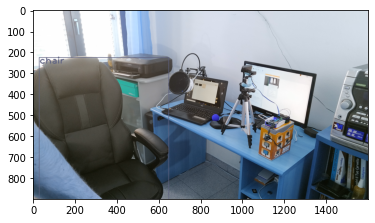

In [9]:
plt.imshow(img)